In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

import re
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
df = pd.read_csv('google-maps-single-dataset-for-conference.csv',encoding='ISO-8859-1')
df = df[pd.notnull(df['Claim_Type'])]
df = df.replace("neu ", "neu")
df = df.replace("supporting ", "supporting")
df = df.replace("attacking ", "attacking")
df = df.replace("atacking ", "attacking")
df = df.replace("attacknig ", "attacking")
df= df[df.Rationale_Type=='claim']
print(df.Claim_Type.value_counts())
#print(df.head(10))
#print(df['comment_Text'].apply(lambda x: len(x.split(' '))).sum())

neu           772
supporting    762
attacking     542
Name: Claim_Type, dtype: int64


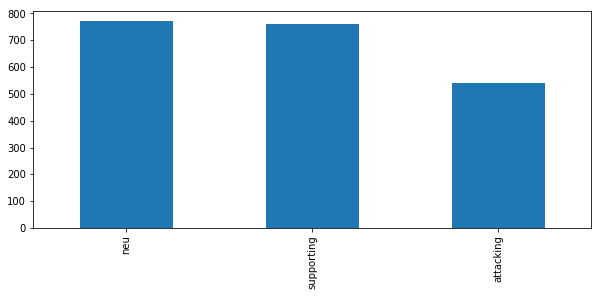

In [5]:
my_tags = ['neu','supporting','attacking']
plt.figure(figsize=(10,4))
df.Claim_Type.value_counts().plot(kind='bar');

In [6]:
X = df['comment_Text'].values.astype('U')
y = df['Claim_Type'].values.astype('U')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#print(len(X_train))
#print(len(X_test))

In [7]:
#added extra
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    #fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    #predictions the labels on validation dataset
    predictions= classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions= predictions.argmax(axis= -1)
        
    return predictions

In [8]:
#Kfold classification for NBM, SVM, LR and RF using countvectorizor

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM =[]
alg_accurcy_SVM =[]
alg_accurcy_LR =[]
alg_accurcy_RF =[]

score_array_NBM= []
score_array_SVM= []
score_array_LR= []
score_array_RF= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    vect= CountVectorizer(max_features=1000, binary=True)
    X_train_vect= vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    
    sm= SMOTE()
    X_train_res, y_train_res= sm.fit_sample(X_train_vect, y_train)
    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_NBM.append(accuracy_score(predictions, y_test))
    score_array_NBM.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(svm.SVC(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_SVM.append(accuracy_score(predictions, y_test))
    score_array_SVM.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_LR.append(accuracy_score(predictions, y_test))
    score_array_LR.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_RF.append(accuracy_score(predictions, y_test))
    score_array_RF.append(precision_recall_fscore_support(y_test,predictions, average=None))

average_accuracy_NBM= np.mean(alg_accurcy_NBM, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM)

average_accuracy_SVM= np.mean(alg_accurcy_SVM, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM)

average_accuracy_LR= np.mean(alg_accurcy_LR, axis=0)
print("the average accuracy of LR is",average_accuracy_LR)

average_accuracy_RF= np.mean(alg_accurcy_RF, axis=0)
print("the average accuracy of RF is",average_accuracy_RF)
    
average_scire_NBM=np.mean(score_array_NBM, axis=0)
print(average_scire_NBM)

average_scire_SVM=np.mean(score_array_SVM, axis=0)
print(average_scire_SVM)

average_scire_LR=np.mean(score_array_LR, axis=0)
print(average_scire_LR)

average_scire_RF=np.mean(score_array_RF, axis=0)
print(average_scire_RF)


the average accuracy of NBM is 0.456152452619844
the average accuracy of SVM is 0.40522342995169086
the average accuracy of LR is 0.46681298773690083
the average accuracy of RF is 0.39496237458193983
[[ 0.3500399   0.48566767  0.5262019 ]
 [ 0.47932553  0.33782664  0.56202192]
 [ 0.40033725  0.39510117  0.53685788]
 [54.2        77.2        76.2       ]]
[[ 0.36073608  0.40620385  0.4899984 ]
 [ 0.09500605  0.91890626  0.11801665]
 [ 0.14577762  0.55495079  0.18372464]
 [54.2        77.2        76.2       ]]
[[ 0.33702494  0.50708953  0.52900168]
 [ 0.41288728  0.44846743  0.511735  ]
 [ 0.36943092  0.4737323   0.51369113]
 [54.2        77.2        76.2       ]]
[[ 0.27090884  0.43538482  0.50898038]
 [ 0.37190309  0.38133183  0.42844573]
 [ 0.31014581  0.40109637  0.45656004]
 [54.2        77.2        76.2       ]]


In [9]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf =[]
alg_accurcy_SVM_tfidf =[]
alg_accurcy_LR_tfidf =[]
alg_accurcy_RF_tfidf =[]



#x_train_tfidf

score_array_NBM_tfidf= []
score_array_SVM_tfidf= []
score_array_LR_tfidf= []
score_array_RF_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', max_features=5000)
    tfidf_vect.fit(X_train)
    x_train_tfidf=tfidf_vect.transform(X_train)
    x_test_tfidf=tfidf_vect.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf, y_train_res_tfidf= sm.fit_sample(x_train_tfidf, y_train)
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_NBM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_SVM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_LR_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_RF_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_tfidf= np.mean(alg_accurcy_NBM_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf)

average_accuracy_SVM_tfidf= np.mean(alg_accurcy_SVM_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf)

average_accuracy_LR_tfidf= np.mean(alg_accurcy_LR_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf)

average_accuracy_RF_tfidf= np.mean(alg_accurcy_RF_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf)
    
average_scire_NBM_tfidf=np.mean(score_array_NBM_tfidf, axis=0)
print(average_scire_NBM_tfidf)

average_scire_SVM_tfidf=np.mean(score_array_SVM_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_tfidf=np.mean(score_array_LR_tfidf, axis=0)
print(average_scire_LR_tfidf)

average_scire_RF_tfidf=np.mean(score_array_RF_tfidf, axis=0)
print(average_scire_RF_tfidf)

the average accuracy of NBM is 0.4378181902638424
the average accuracy of SVM is 0.4716973244147157
the average accuracy of LR is 0.5096711259754738
the average accuracy of RF is 0.4619727796358231
[[ 0.34192517  0.66650214  0.53189448]
 [ 0.74950125  0.15952262  0.49676367]
 [ 0.46598415  0.25390334  0.5070395 ]
 [54.2        77.2        76.2       ]]
[[ 0.36965138  0.50109359  0.64240938]
 [ 0.47869645  0.75887682  0.18296876]
 [ 0.40680795  0.59263631  0.27850864]
 [54.2        77.2        76.2       ]]
[[ 0.40392034  0.55296447  0.55806136]
 [ 0.47478743  0.52615879  0.52895801]
 [ 0.4306003   0.53094036  0.53605456]
 [54.2        77.2        76.2       ]]
[[ 0.37462261  0.4913267   0.49494372]
 [ 0.37626154  0.5778322   0.42311436]
 [ 0.36804822  0.52069182  0.44973407]
 [54.2        77.2        76.2       ]]


In [10]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'word' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf_W_ngram =[]
alg_accurcy_SVM_tfidf_W_ngram =[]
alg_accurcy_LR_tfidf_W_ngram =[]
alg_accurcy_RF_tfidf_W_ngram =[]



#x_train_tfidf

score_array_NBM_tfidf_W_ngram= []
score_array_SVM_tfidf_W_ngram= []
score_array_LR_tfidf_W_ngram= []
score_array_RF_tfidf_W_ngram= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    tfidf_vect_ngram= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', ngram_range=(1,3), max_features=5000)
    tfidf_vect_ngram.fit(X_train)
    x_train_ngram=tfidf_vect_ngram.transform(X_train)
    x_test_ngram=tfidf_vect_ngram.transform(X_test)
    
    sm= SMOTE()
    X_train_res_tfidf_ngram, y_train_res_tfidf_ngram= sm.fit_sample(x_train_ngram, y_train)

    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_NBM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_SVM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_LR_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_RF_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))

average_accuracy_NBM_tfidf_W_ngram= np.mean(alg_accurcy_NBM_tfidf_W_ngram, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf_W_ngram)

average_accuracy_SVM_tfidf_W_ngram= np.mean(alg_accurcy_SVM_tfidf_W_ngram, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf_W_ngram)

average_accuracy_LR_tfidf_W_ngram= np.mean(alg_accurcy_LR_tfidf_W_ngram, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf_W_ngram)

average_accuracy_RF_tfidf_W_ngram= np.mean(alg_accurcy_RF_tfidf_W_ngram, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf_W_ngram)
    
average_scire_NBM_tfidf_W_ngram=np.mean(score_array_NBM_tfidf_W_ngram, axis=0)
print(average_scire_NBM_tfidf_W_ngram)

average_scire_SVM_tfidf_W_ngram=np.mean(score_array_SVM_tfidf_W_ngram, axis=0)
print(average_scire_SVM_tfidf_W_ngram)

average_scire_LR_tfidf_W_ngram=np.mean(score_array_LR_tfidf_W_ngram, axis=0)
print(average_scire_LR_tfidf_W_ngram)

average_scire_RF_tfidf_W_ngram=np.mean(score_array_RF_tfidf_W_ngram, axis=0)
print(average_scire_RF_tfidf_W_ngram)

the average accuracy of NBM is 0.4455197881828317
the average accuracy of SVM is 0.47066610925306573
the average accuracy of LR is 0.5043571163136381
the average accuracy of RF is 0.4340765514678558
[[ 0.33832204  0.58066427  0.54188556]
 [ 0.65329379  0.24665803  0.51156075]
 [ 0.44161951  0.34064867  0.51709555]
 [54.2        77.2        76.2       ]]
[[ 0.37242931  0.52193939  0.58168378]
 [ 0.58126399  0.58921557  0.27643623]
 [ 0.44125204  0.54250223  0.3606373 ]
 [54.2        77.2        76.2       ]]
[[ 0.41207489  0.53272686  0.55200537]
 [ 0.47962334  0.51118311  0.52367262]
 [ 0.4372775   0.5159207   0.53124574]
 [54.2        77.2        76.2       ]]
[[ 0.36434324  0.44702513  0.489705  ]
 [ 0.38265784  0.54748999  0.36773744]
 [ 0.36498106  0.48378017  0.41444465]
 [54.2        77.2        76.2       ]]


In [11]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'char' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_C_tfidf =[]
alg_accurcy_SVM_C_tfidf =[]
alg_accurcy_LR_C_tfidf =[]
alg_accurcy_RF_C_tfidf =[]



#x_train_tfidf

score_array_NBM_C_tfidf= []
score_array_SVM_C_tfidf= []
score_array_LR_C_tfidf= []
score_array_RF_C_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect_ngram_chars= TfidfVectorizer(analyzer='char', token_pattern= r'\w{1,}', ngram_range=(2,3), max_features=5000)
    tfidf_vect_ngram_chars.fit(X_train)
    x_train_ngram_char=tfidf_vect_ngram_chars.transform(X_train)
    x_test_ngram_char=tfidf_vect_ngram_chars.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf_ngram_char, y_train_res_tfidf_ngram_char= sm.fit_sample(x_train_ngram_char, y_train)
    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_NBM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_SVM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_LR_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_RF_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_C_tfidf= np.mean(alg_accurcy_NBM_C_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_C_tfidf)

average_accuracy_SVM_C_tfidf= np.mean(alg_accurcy_SVM_C_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_C_tfidf)

average_accuracy_LR_C_tfidf= np.mean(alg_accurcy_LR_C_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_C_tfidf)

average_accuracy_RF_C_tfidf= np.mean(alg_accurcy_RF_C_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_C_tfidf)
    
average_scire_NBM_C_tfidf=np.mean(score_array_NBM_C_tfidf, axis=0)
print(average_scire_NBM_C_tfidf)

average_scire_SVM_C_tfidf=np.mean(score_array_SVM_C_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_C_tfidf=np.mean(score_array_LR_C_tfidf, axis=0)
print(average_scire_LR_C_tfidf)

average_scire_RF_C_tfidf=np.mean(score_array_RF_C_tfidf, axis=0)
print(average_scire_RF_C_tfidf)

the average accuracy of NBM is 0.41807413600891863
the average accuracy of SVM is 0.44561501300631734
the average accuracy of LR is 0.49331103678929766
the average accuracy of RF is 0.4263401151988108
[[ 0.3315043   0.67551933  0.53063128]
 [ 0.78898088  0.15100111  0.42758773]
 [ 0.46285321  0.24144302  0.46746872]
 [54.2        77.2        76.2       ]]
[[ 0.36965138  0.50109359  0.64240938]
 [ 0.47869645  0.75887682  0.18296876]
 [ 0.40680795  0.59263631  0.27850864]
 [54.2        77.2        76.2       ]]
[[ 0.39146534  0.53937969  0.53640305]
 [ 0.44908398  0.55753826  0.47800055]
 [ 0.41180352  0.53696736  0.49955946]
 [54.2        77.2        76.2       ]]
[[ 0.33767017  0.46173708  0.47166005]
 [ 0.35859642  0.49639434  0.41287477]
 [ 0.34282072  0.46877106  0.43329652]
 [54.2        77.2        76.2       ]]


In [36]:
predictions0 = train_model(naive_bayes.MultinomialNB(),X_train_res,y_train_res,X_test_vect)
predictions1 = train_model(svm.SVC(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
predictions2 = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
predictions3 = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)

In [37]:
multi_prediction = [];
for i in range(len(predictions0)):
    temp = []
    temp.append(predictions0[i])
    temp.append(predictions1[i])
    temp.append(predictions2[i])
    temp.append(predictions3[i])
    multi_prediction.append(max(set(temp), key=temp.count))
print('accuracy %s' % accuracy_score(multi_prediction, y_test))
print('f1 %s' % f1_score(multi_prediction, y_test, average='macro'))
print(classification_report(y_test, multi_prediction,target_names=my_tags))

accuracy 0.49514563106796117
f1 0.43931623931623937
              precision    recall  f1-score   support

    positive       0.41      0.22      0.29        32
    negative       0.50      0.31      0.38        32
     neutral       0.52      0.87      0.65        39

   micro avg       0.50      0.50      0.50       103
   macro avg       0.48      0.47      0.44       103
weighted avg       0.48      0.50      0.45       103

